# Grouping

In [167]:
import pandas as pd
import numpy as np

data = {
    '주문번호': [1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010],
    '고객ID': ['A', 'B', 'A', 'C', 'B', 'A', 'D', 'C', 'B', 'D'],
    '상품카테고리': ['전자제품', '의류', '가구', '전자제품', '의류', '식품', '가구', '식품', '전자제품', '의류'],
    '구매액': [150000, 75000, 220000, 95000, 82000, 45000, 180000, 35000, 120000, 62000],
    '배송지역': ['서울', '부산', '서울', '인천', '서울', '부산', '인천', '서울', '부산', '인천'],
    '할인률': [0.05, 0.1, 0, 0.2, 0.1, 0, 0.05, 0.15, 0.2, 0]
}

df = pd.DataFrame(data)

In [183]:
df.groupby('고객ID')['구매액'].sum()

# 고객 id로 그룹핑
id_group = df.groupby('고객ID')

# 그룹 확인 (고객 ID들 그룹) !!!!!!!!!!!!!!!!!!!!!!!!
id_group.groups.keys()
print(id_group.groups) # .groups는 그룹핑 결과를 '딕셔너리 형태'로 보여줌

# 특정 그룹 데이터 확인
id_group.get_group('A')



# 여러 col으로 그룹핑 -> 멀티 인덱스를 가진 Series임.. 사실 값은 '구매액' 행 부분밖에 없어~!
multi_group = df.groupby(['고객ID', '상품카테고리'])['구매액'].sum()
print(multi_group)
print(multi_group.unstack())

# DF로 변환
multi_group.to_frame()
multi_group.to_frame().index[0]



{'A': [0, 2, 5], 'B': [1, 4, 8], 'C': [3, 7], 'D': [6, 9]}
고객ID  상품카테고리
A     가구        220000
      식품         45000
      전자제품      150000
B     의류        157000
      전자제품      120000
C     식품         35000
      전자제품       95000
D     가구        180000
      의류         62000
Name: 구매액, dtype: int64
상품카테고리        가구       식품        의류      전자제품
고객ID                                         
A       220000.0  45000.0       NaN  150000.0
B            NaN      NaN  157000.0  120000.0
C            NaN  35000.0       NaN   95000.0
D       180000.0      NaN   62000.0       NaN


('A', '가구')

In [ ]:
# 1개의 col(구매액)에 집계함수 여러개 적용
df.groupby('고객ID')['구매액'].agg(['sum', 'mean', 'count'])


# n개의 col에 m개 집계함수 적용
df.groupby('고객ID').agg({
    '구매액': ['sum', 'mean'],
    '할인률': ['mean', 'max']
})




# 사용자 정의 집계함수 (커스텀 가능) ???????????
def discount_amount(price):
    return (price * df.loc[price.index, '할인률']).sum()

df.groupby('고객ID')['구매액'].agg([
    # AS로 이름 붙여주기, function
    ('총구매액', 'sum'),
    ('평균구매액', 'mean'),
    ('할인총액', discount_amount)
])

,총구매액,평균구매액,할인총액
고객ID,,,
A,415000,138333.333333,7500.0
B,277000,92333.333333,39700.0
C,130000,65000.000000,24250.0
D,242000,121000.000000,9000.0


In [30]:
# 집계 함수 응용
import pandas as pd
import numpy as np

# 샘플 데이터
df = pd.DataFrame({
    '상품ID': ['A001', 'A002', 'A001', 'A003', 'A002', 'A004', 'A003', 'A001', 'A002', 'A004'],
    '판매일자': pd.date_range('2023-01-01', periods=10),
    '판매수량': [5, 3, 7, 2, 4, 6, 3, 8, 5, 4],
    '판매금액': [50000, 30000, 70000, 25000, 40000, 65000, 30000, 80000, 50000, 45000],
    '반품수량': [0, 1, 0, 0, 0, 2, 1, 0, 0, 1],
    '고객평점': [4.5, 3.8, 4.2, 5.0, 4.0, 3.5, 4.2, 4.8, 3.9, 4.1]
})

df.sort_values('상품ID')

,상품ID,판매일자,판매수량,판매금액,반품수량,고객평점
0,A001,2023-01-01,5,50000,0,4.5
2,A001,2023-01-03,7,70000,0,4.2
7,A001,2023-01-08,8,80000,0,4.8
1,A002,2023-01-02,3,30000,1,3.8
4,A002,2023-01-05,4,40000,0,4.0
8,A002,2023-01-09,5,50000,0,3.9
3,A003,2023-01-04,2,25000,0,5.0
6,A003,2023-01-07,3,30000,1,4.2
5,A004,2023-01-06,6,65000,2,3.5
9,A004,2023-01-10,4,45000,1,4.1


In [25]:
df.groupby('상품ID').agg({
    '판매수량': [('총합', 'sum'), 'mean', 'count'],
    '판매금액': ['sum', 'mean'],
    '반품수량': ['sum'],
    '고객평점': ['mean']
})

판매수량                    판매금액               반품수량 고객평점
       총합      mean count     sum          mean  sum mean
상품ID                                                     
A001   20  6.666667     3  200000  66666.666667    0  4.5
A002   12  4.000000     3  120000  40000.000000    1  3.9
A003    5  2.500000     2   55000  27500.000000    1  4.6
A004   10  5.000000     2  110000  55000.000000    3  3.8

In [ ]:
# shift + enter 누르면 셀 생김

In [33]:
# 커스텀 함수
# 총 판매수량 대비 반품수량 비율 계산

def return_rate(x):
    total_sold = df.loc[x.index, '판매수량'].sum()
    total_returned = df.loc[x.index, '반품수량'].sum()
    return total_returned / total_sold if total_sold > 0 else 0

df.groupby('상품ID').agg({
    '판매수량': ['sum', 'count'],
    '반품수량': ['sum', return_rate]
    })

판매수량       반품수량            
      sum count  sum return_rate
상품ID                            
A001   20     3    0    0.000000
A002   12     3    1    0.083333
A003    5     2    1    0.200000
A004   10     2    3    0.300000

In [ ]:
## 그룹별 순위 및 누적 계산
import pandas as pd
import numpy as np

# 샘플 데이터: 부서별 직원 실적
data = {
    '직원ID': [101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112],
    '이름': ['김철수', '이영희', '박민수', '정지영', '최동민', '강준호', '윤서연', '임태혁', '한미래', '송지원', '오민지', '홍길동'],
    '부서': ['영업', '개발', '영업', '인사', '개발', '영업', '개발', '인사', '영업', '개발', '영업', '인사'],
    '월별실적': [120, 85, 95, 110, 75, 135, 95, 105, 115, 90, 125, 100],
    '고객평가': [4.5, 3.8, 4.2, 4.7, 3.9, 4.8, 4.1, 4.3, 4.5, 4.0, 4.6, 4.2]
}

df = pd.DataFrame(data)
print("부서별 직원 실적 데이터:")
print(df)

부서별 직원 실적 데이터:
    직원ID   이름  부서  월별실적  고객평가
0    101  김철수  영업   120   4.5
1    102  이영희  개발    85   3.8
2    103  박민수  영업    95   4.2
3    104  정지영  인사   110   4.7
4    105  최동민  개발    75   3.9
5    106  강준호  영업   135   4.8
6    107  윤서연  개발    95   4.1
7    108  임태혁  인사   105   4.3
8    109  한미래  영업   115   4.5
9    110  송지원  개발    90   4.0
10   111  오민지  영업   125   4.6
11   112  홍길동  인사   100   4.2


In [40]:
# 그룹 내 순위를 계싼해보자
dept_group = df.groupby('부서')

# 부서별 월별 실적! dense는 랭크 방식! 윈도우 함수에서 배움!
df['부서순위_실적'] = dept_group['월별실적'].rank(method='dense', ascending=False)

df

,직원ID,이름,부서,월별실적,고객평가,부서순위_실적
0,101,김철수,영업,120,4.5,3.0
1,102,이영희,개발,85,3.8,3.0
2,103,박민수,영업,95,4.2,5.0
3,104,정지영,인사,110,4.7,1.0
4,105,최동민,개발,75,3.9,4.0
5,106,강준호,영업,135,4.8,1.0
6,107,윤서연,개발,95,4.1,1.0
7,108,임태혁,인사,105,4.3,2.0
8,109,한미래,영업,115,4.5,4.0
9,110,송지원,개발,90,4.0,2.0


In [ ]:
# 누적 합계 및 누적 통계
# 부서별 누적 실적 합계 -> accmulate cummulate

df['부서별누적합계'] = df.groupby('부서')['월별실적'].cumsum()
df['부서별누적최대'] = df.groupby('부서')['월별실적'].cummax()

# 그룹별 비율 계산
# 부서별 총 실적 대비, 개인 실적 비율
df['부서총실적'] = df.groupby('부서')['월별실적'].transform('sum') # transform
df['부서기여도'] = df['월별실적'] / df['부서총실적']


# 복합응용
# 성과점수 = 0.7 실적 + 0.3 (평가*20)
df['성과점수'] = df['월별실적']*0.7 + df['고객평가']* 0.3 * 20
df['부서순위_성과'] = dept_group['성과점수'].rank(method='dense', ascending=False) # 이 부분 다시!!!!!!!!!!!!!!!!!!


df

,직원ID,이름,부서,월별실적,고객평가,부서순위_실적,부서별누적합계,부서별누적최대,부서별누적평균,부서총실적,부서기여도,성과점수,부서순위_성과
0,101,김철수,영업,120,4.5,3.0,120,120,120.000000,590,0.203390,111.0,3.0
1,102,이영희,개발,85,3.8,3.0,85,85,85.000000,345,0.246377,82.3,3.0
2,103,박민수,영업,95,4.2,5.0,215,120,107.500000,590,0.161017,91.7,5.0
3,104,정지영,인사,110,4.7,1.0,110,110,110.000000,315,0.349206,105.2,1.0
4,105,최동민,개발,75,3.9,4.0,160,85,80.000000,345,0.217391,75.9,4.0
5,106,강준호,영업,135,4.8,1.0,350,135,116.666667,590,0.228814,123.3,1.0
6,107,윤서연,개발,95,4.1,1.0,255,95,85.000000,345,0.275362,91.1,1.0
7,108,임태혁,인사,105,4.3,2.0,215,110,107.500000,315,0.333333,99.3,2.0
8,109,한미래,영업,115,4.5,4.0,465,135,116.250000,590,0.194915,107.5,4.0
9,110,송지원,개발,90,4.0,2.0,345,95,86.250000,345,0.260870,87.0,2.0


# 실습하깅: 매출 데이터 그룹별 분석

In [52]:
# 실습: 매출 데이터 그룹별 분석
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 매출 데이터 생성
np.random.seed(42)

# 날짜 생성 (2023년 전체)
dates = pd.date_range('2023-01-01', '2023-12-31')
n_records = 500

data = {
    '주문ID': np.arange(1001, 1001 + n_records),
    '주문일자': np.random.choice(dates, n_records),
    '고객ID': np.random.choice([f'CUST{i:03d}' for i in range(1, 101)], n_records),
    '상품ID': np.random.choice([f'PROD{i:03d}' for i in range(1, 51)], n_records),
    '카테고리': np.random.choice(['전자제품', '의류', '가구', '식품', '화장품', '도서', '스포츠'], n_records),
    '매출액': np.random.randint(10000, 500000, n_records),
    '수량': np.random.randint(1, 10, n_records),
    '지역': np.random.choice(['서울', '부산', '인천', '대구', '광주', '대전', '울산', '경기', '강원'], n_records),
    '결제방법': np.random.choice(['신용카드', '현금', '체크카드', '휴대폰', '계좌이체'], n_records),
    '고객등급': np.random.choice(['일반', '실버', '골드', 'VIP'], n_records)
}

df = pd.DataFrame(data)
df

,주문ID,주문일자,고객ID,상품ID,카테고리,매출액,수량,지역,결제방법,고객등급
0,1001,2023-04-13,CUST002,PROD011,식품,384899,4,대구,현금,골드
1,1002,2023-12-15,CUST092,PROD004,도서,66985,7,대전,체크카드,VIP
2,1003,2023-09-28,CUST032,PROD015,가구,322213,9,강원,체크카드,일반
3,1004,2023-04-17,CUST091,PROD006,스포츠,324470,2,대전,체크카드,실버
4,1005,2023-03-13,CUST084,PROD049,화장품,118737,3,강원,현금,VIP
...,...,...,...,...,...,...,...,...,...,...
495,1496,2023-11-21,CUST095,PROD049,전자제품,44084,2,광주,체크카드,VIP
496,1497,2023-01-04,CUST006,PROD017,화장품,261459,3,경기,체크카드,실버
497,1498,2023-01-16,CUST066,PROD010,도서,120641,1,경기,계좌이체,실버
498,1499,2023-10-07,CUST084,PROD049,전자제품,115111,8,인천,현금,실버


In [ ]:
# 검색후 하기
# 날짜 정보 추출 -> 컬럼 추가 ['주문년월', '요일', '주']
# 'dt'는 datetime 속성에 접근하는 Pandas 전용 도우미!!!!!

df['주문년월'] =  df['주문일자'].dt.strftime('%Y-%m') #str format time

df['요일'] = df['주문일자'].dt.day_name()

df['주'] = df['주문일자'].dt.isocalendar().week
df.head()

# 특정 조건. 1/1인 행들만 확인
df[ df['주문일자'] =='2023-01-01' ]

,주문ID,주문일자,고객ID,상품ID,카테고리,매출액,수량,지역,결제방법,고객등급,주문년월,요일,주,제품단가
446,1447,2023-01-01,CUST090,PROD011,전자제품,267368,6,강원,체크카드,골드,2023-01,Sunday,52,44561.333333


In [ ]:
# 단가 계산 
# 단가 컬럼 추가 (매출액/수량) 
df['제품단가'] = (df['매출액'] / df['수량']).round(2) # round 둘째자리까지 남기고 반올림
df.head()

,주문ID,주문일자,고객ID,상품ID,카테고리,매출액,수량,지역,결제방법,고객등급,주문년월,요일,주,제품단가
0,1001,2023-04-13,CUST002,PROD011,식품,384899,4,대구,현금,골드,2023-04,Thursday,15,96224.75
1,1002,2023-12-15,CUST092,PROD004,도서,66985,7,대전,체크카드,VIP,2023-12,Friday,50,9569.29
2,1003,2023-09-28,CUST032,PROD015,가구,322213,9,강원,체크카드,일반,2023-09,Thursday,39,35801.44
3,1004,2023-04-17,CUST091,PROD006,스포츠,324470,2,대전,체크카드,실버,2023-04,Monday,16,162235.00
4,1005,2023-03-13,CUST084,PROD049,화장품,118737,3,강원,현금,VIP,2023-03,Monday,11,39579.00


In [96]:
# 카테고리별 매출 분석 
# 매출액 총합,평균,개수 /  수량 총합

df.groupby('카테고리').agg({
    '매출액': ['sum', 'mean', 'count'],
    '수량': 'sum'
})

매출액                        수량
           sum           mean count  sum
카테고리                                    
가구    19263561  267549.458333    72  348
도서    17826814  254668.771429    70  374
스포츠   17729088  268622.545455    66  332
식품    16816186  254790.696970    66  299
의류    17971859  253124.774648    71  359
전자제품  19526279  256924.723684    76  358
화장품   20600588  260766.936709    79  386

In [ ]:
# 월별 매출 트렌드
# '주문년월' 컬럼으로 매출액 sum, 주문ID count, 단가 mean

df.groupby('주문년월').agg({
    '매출액': 'sum',
    '주문ID': 'count',
    '제품단가':  lambda x: x.mean().round(2) # 여기 다시 한번 보기 ????????????????????
}).rename(columns={'주문ID':'주문건수'}) # 컬럼 이름 바꾸장

,매출액,주문건수,제품단가
주문년월,,,
2023-01,7786750,31,68573.32
2023-02,13558838,47,83141.03
2023-03,4820044,23,67224.54
2023-04,13329098,49,97647.61
2023-05,12825903,51,88883.44
2023-06,10302473,44,64922.53
2023-07,11575996,37,107918.45
2023-08,11604378,47,69333.94
2023-09,11646019,45,76389.96


In [161]:
# 지역 & 카테고리별 매출 분석
# unstack -> 다중인덱스 구조를 열로 펼쳐서 재구조화 함!!!!!
regional_df = df.groupby(['지역', '카테고리'])['매출액'].sum().unstack()

c:\Users\agnes\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\agnes\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\agnes\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\agnes\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\agnes\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users

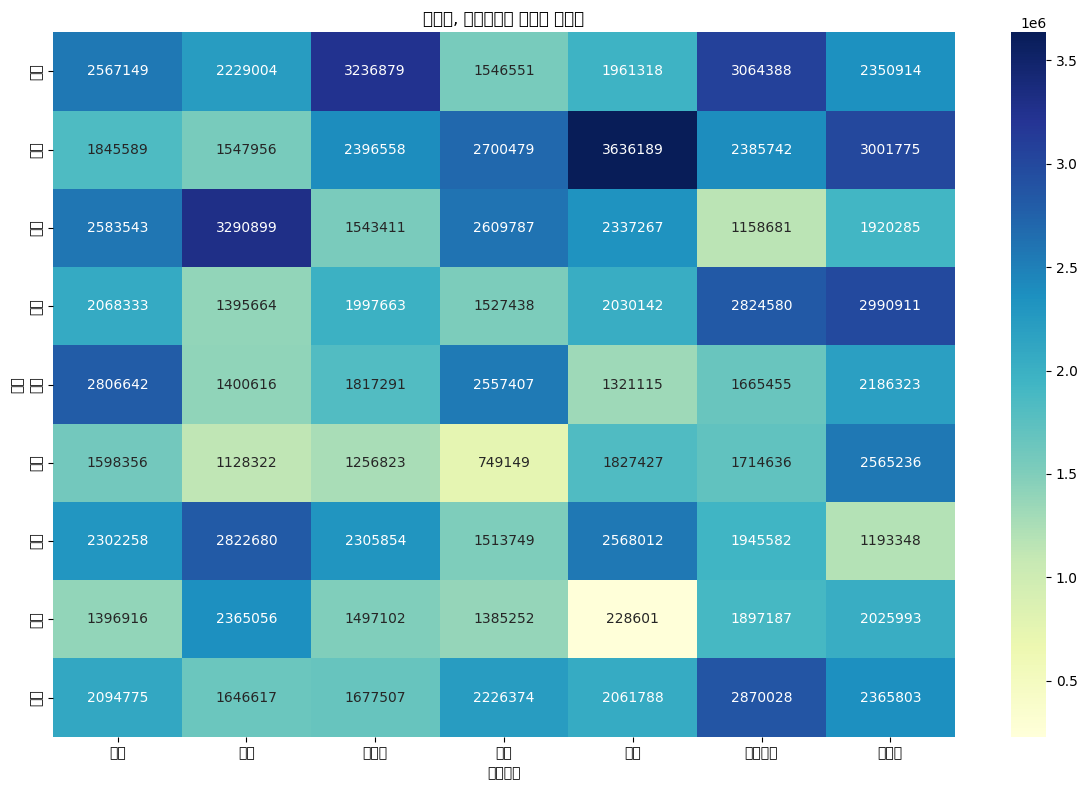

In [162]:
# 위의 DF을 히트맵으로 시각화!
plt.figure(figsize=(12, 8))
sns.heatmap(regional_df, cmap='YlGnBu', annot=True, fmt='.0f')
plt.title('지역별, 카테고리별 매출액 히트맵')
plt.tight_layout()
plt.show()

In [ ]:
# 요일별 고객 등급별 매출 패턴

# 요일의 순서 지정!!! 날짜에 순서 부여해서 범주화!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['요일'] = pd.Categorical(df['요일'], categories=day_order, ordered=True)


# 가설은 있다 치고 검증 중인 거임~~~~~
result = df.groupby(['요일', '고객등급']).agg({
    '매출액': ['sum', 'mean', 'count']
})

# 요일별로, 매출 총액 기준 정렬 # (매출액, sum)은 agg만들 때 애초에 튜플 형태!라서 쓸 때도 그렇게
result.sort_values(['요일', ('매출액', 'sum')], ascending=False)

매출액                     
                    sum           mean count
요일        고객등급                              
Wednesday 골드    4295608  204552.761905    21
          실버    3749879  312489.916667    12
          일반    3383430  241673.571429    14
          VIP   3323716  221581.066667    15
Tuesday   골드    5357448  255116.571429    21
          VIP   4955018  275278.777778    18
          실버    4777296  318486.400000    15
          일반    4184996  246176.235294    17
Thursday  일반    6456148  258245.920000    25
          골드    5601373  294809.105263    19
          VIP   5066444  253322.200000    20
          실버    4273034  284868.933333    15
Sunday    일반    5079060  241860.000000    21
          VIP   4838696  254668.210526    19
          실버    4501861  281366.312500    16
          골드    3240409  202525.562500    16
Saturday  실버    5460233  273011.650000    20
          VIP   4298206  252835.647059    17
          일반    4178794  261174.625000    16
          골드    4124191  274946.066667    15
Monday    일반    7265467  269091.370370    27
          VIP   6182434  281019.727273    22
          실버    4532290  238541.578947    19
          골드    3402384  226825.600000    15
Friday    골드    5563601  309088.944444    18
          실버    4584163  286510.187500    16
          일반    4059550  225530.555556    18
          VIP   2998646  230665.076923    13

In [158]:
# 결제방법별 분석 및 고객 행동 (매출액-sum mean count, 단가-mean)

def ratio(x):
    return x.sum() / df['매출액'].sum()

df.groupby('결제방법').agg({
    '매출액': ['sum', 'mean', 'count', ratio],
    '제품단가': 'mean'
})


매출액                                         제품단가
           sum           mean count     ratio          mean
결제방법                                                       
계좌이체  26376866  251208.247619   105  0.203314  81029.835429
신용카드  25514730  260354.387755    98  0.196669  89773.785000
체크카드  26536652  260163.254902   102  0.204546  66063.697843
현금    25579043  272117.478723    94  0.197165  81782.442660
휴대폰   25727084  254723.603960   101  0.198306  84024.975347

In [ ]:
# 고객id 별 구매 패턴 (매출액 sum mean count, 구매한 상품 고유 수, 고유 카테고리 )
# 고유한게 몇개인지? nunique, 고유한게 뭔지? unique
df.groupby('고객ID').agg({
    '매출액':['sum', 'mean', 'count'],
    '상품ID': 'nunique',
    '카테고리': 'unique'
}).sort_values[([(), ()])]

매출액                         상품ID                         카테고리
             sum           mean count nunique                       unique
고객ID                                                                      
CUST001  1402103  233683.833333     6       6           [의류, 화장품, 스포츠, 식품]
CUST002   711236  237078.666667     3       3                [식품, 도서, 스포츠]
CUST003  1433221  238870.166667     6       6           [가구, 전자제품, 식품, 의류]
CUST004  1544341  257390.166667     6       5              [가구, 화장품, 전자제품]
CUST005  2709222  338652.750000     8       8        [스포츠, 의류, 도서, 식품, 가구]
...          ...            ...   ...     ...                          ...
CUST096  1018021  203604.200000     5       5         [화장품, 가구, 전자제품, 스포츠]
CUST097    39165   39165.000000     1       1                         [가구]
CUST098  1282296  256459.200000     5       5           [의류, 식품, 가구, 전자제품]
CUST099  1082794  135349.250000     8       7  [도서, 가구, 전자제품, 스포츠, 의류, 식품]
CUST100  1253171  313292.750000     4       4          [도서, 전자제품, 의류, 화장품]

[100 rows x 5 columns]

In [ ]:
# 주별 매출 추이
df[['주', '매출액']].head()
# 일단 주 단위로 정렬을 하고? 그 다음 diff...?
# 아니면 주별로 매출총액을 구하고, 그 다음 주 단위로 정렬..
weekly_sales = df.groupby('주')['매출액'].sum().reset_index()
weekly_sales = weekly_sales.sort_values(['주문년월', '주'])

# .pct_change()는 바로 이전 행과의 비율 차이를 계산
# fillna(0)으로 첫 주의 결측치는 0으로 처리 (전주 없으니까 0으로)
weekly_sales['매출증감률'] = weekly_sales['매출액'].pct_change().fillna(0)

weekly_sales



KeyError: '주문연월'

In [ ]:
# 매출 TOP 10 상품 + 카테고리별로 보고 싶었음
df.groupby(['카테고리', '상품ID'])['매출액'].sum().sort_values(ascending=False).head(10)

# 다 보지 말고 딱 10개만. 효율적임!
df.groupby(['카테고리', '상품ID'])['매출액'].sum().nlargest(10)

카테고리  상품ID   
화장품   PROD047    1935016
      PROD026    1797599
의류    PROD020    1644860
전자제품  PROD040    1466151
도서    PROD043    1383743
스포츠   PROD010    1349127
      PROD009    1315282
의류    PROD010    1283079
도서    PROD028    1281527
식품    PROD040    1218737
Name: 매출액, dtype: int32

# 데이터 결합
1. 데이터 단순 결합(행 결합)
2. 데이터 병합
3. Index 기준 Join

In [ ]:
# 데이터 결합 기초 (concat) - 행결합 (Col 똑같아야 함)

# 샘플 데이터 생성
# 첫 번째 데이터프레임: 1월 판매 데이터
df1 = pd.DataFrame({
    '상품ID': ['A001', 'A002', 'A003', 'A004', 'A005'],
    '상품명': ['노트북', '스마트폰', '태블릿', '헤드폰', '스피커'],
    '판매량_1월': [10, 20, 15, 30, 25]
})

# 두 번째 데이터프레임: 2월 판매 데이터
df2 = pd.DataFrame({
    '상품ID': ['A001', 'A003', 'A005', 'A006', 'A007'],
    '상품명': ['노트북', '태블릿', '스피커', '마우스', '키보드'],
    '판매량_2월': [12, 18, 23, 15, 19]
})

# 기본 concat - 행 결합 -> 안맞는 컬럼은 NaN
pd.concat([df1, df2])

# 인덱스 초기화 (겹치는 인덱스 없이 처음부터 다시)
pd.concat([df1, df2], ignore_index=True)

# 열 방향 결합
pd.concat([df1, df2], axis=1)

# join inner (공통 열만 유지)
pd.concat([df1, df2], join='inner')

In [ ]:
# 데이터 병합 (merge)
import pandas as pd
import numpy as np

# 샘플 데이터 생성
# 상품 정보 데이터프레임
products = pd.DataFrame({
    '상품ID': ['P001', 'P002', 'P003', 'P004', 'P005'],
    '상품명': ['노트북', '스마트폰', '태블릿', '헤드폰', '스피커'],
    '가격': [1200000, 850000, 500000, 150000, 75000],
    '카테고리': ['컴퓨터', '모바일', '모바일', '음향기기', '음향기기']
})

# 주문 정보 데이터프레임
orders = pd.DataFrame({
    '주문번호': [1001, 1002, 1003, 1004, 1005, 1006],
    '고객ID': ['C001', 'C002', 'C003', 'C001', 'C004', 'C002'],
    '상품ID': ['P001', 'P002', 'P003', 'P002', 'P005', 'P006'],
    '수량': [1, 2, 1, 1, 3, 2],
    '주문일자': ['2023-01-05', '2023-01-10', '2023-01-15', '2023-01-20', '2023-01-25', '2023-01-30']
})

print("상품 정보:")
print(products)
print("\n주문 정보:")

In [ ]:
customers = pd.DataFrame({
    'ID': ['C001', 'C002', 'C003', 'C004', 'C005'],
    '이름': ['김철수', '이영희', '박민수', '정지영', '최동민'],
    '등급': ['VIP', '골드', '실버', '골드', '브론즈']
})

# 열 이름이 다르면?
pd.merge(
    orders, 
    customers, 
    left_on='고객ID',  # orders 데이터프레임의 열 이름
    right_on='ID',    # customers 데이터프레임의 열 이름
    how='inner'
)

## 해볼테면 해봐

In [ ]:
# 샘플 데이터셋 생성
# 1. 고객 정보 데이터
customers = pd.DataFrame({
    '고객ID': [f'CUST{i:03d}' for i in range(1, 11)],
    '이름': ['김철수', '이영희', '박민수', '정지영', '최동민', '강준호', '윤서연', '임태혁', '한미래', '송지원'],
    '성별': ['남', '여', '남', '여', '남', '남', '여', '남', '여', '여'],
    '연령대': ['30대', '20대', '40대', '30대', '50대', '20대', '40대', '30대', '20대', '50대'],
    '가입일자': pd.date_range('2023-01-01', periods=10, freq='3D'),
    '지역': ['서울', '부산', '서울', '인천', '대구', '서울', '부산', '인천', '서울', '대구']
})

# 2. 주문 정보 데이터
np.random.seed(42)
n_orders = 50

orders = pd.DataFrame({
    '주문번호': [f'ORD{i:04d}' for i in range(1, n_orders+1)],
    '고객ID': np.random.choice(customers['고객ID'], n_orders),
    '주문일자': pd.date_range('2023-01-05', periods=n_orders, freq='2D'),
    '결제방법': np.random.choice(['신용카드', '체크카드', '계좌이체', '간편결제'], n_orders),
    '배송상태': np.random.choice(['배송완료', '배송중', '주문확인', '배송지연'], n_orders, p=[0.7, 0.15, 0.1, 0.05])
})

# 3. 주문 상세 정보 데이터
n_details = 80
products = ['노트북', '스마트폰', '태블릿', '헤드폰', '스피커', '키보드', '마우스', '모니터']
categories = ['전자제품', '컴퓨터', '주변기기', '음향기기']

order_details = pd.DataFrame({
    '상세번호': [f'ITEM{i:04d}' for i in range(1, n_details+1)],
    '주문번호': np.random.choice(orders['주문번호'], n_details),
    '상품명': np.random.choice(products, n_details),
    '카테고리': np.random.choice(categories, n_details),
    '수량': np.random.randint(1, 5, n_details),
    '가격': np.random.choice([50000, 100000, 150000, 800000, 1200000, 1500000], n_details),
    '할인율': np.random.choice([0, 0.1, 0.2, 0.3], n_details)
})

# 4. 배송 정보 데이터
shipping = pd.DataFrame({
    '주문번호': orders['주문번호'].unique(),
    '배송사': np.random.choice(['A택배', 'B물류', 'C익스프레스'], len(orders['주문번호'].unique())),
    '배송비': np.random.choice([0, 2500, 5000], len(orders['주문번호'].unique())),
    '출고일자': pd.date_range('2023-01-06', periods=len(orders['주문번호'].unique()), freq='2D')
})

# 5. 고객 만족도 데이터 (일부 주문에 대해서만)
satisfaction_orders = np.random.choice(orders['주문번호'], size=30, replace=False)
satisfaction = pd.DataFrame({
    '주문번호': satisfaction_orders,
    '만족도': np.random.randint(1, 6, 30),
    '리뷰': np.random.choice(['긍정', '중립', '부정'], 30, p=[0.6, 0.3, 0.1]),
    '리뷰일자': pd.date_range('2023-01-15', periods=30, freq='3D')
})

### 혼자 연습 (transform 써보기)

In [186]:
import pandas as pd

df = pd.DataFrame({
    '부서': ['영업', '영업', '기획', '기획', '개발', '개발', '개발'],
    '이름': ['민정', '철수', '영희', '수지', '태호', '준수', '하나'],
    '성과': [100, 120, 90, 85, 130, 110, 140]
})

In [196]:
# 각 행에 부서 평균 성과 붙이고 싶다
df['부서평균'] = df.groupby('부서')['성과'].transform('mean')

# 성과비율 계산 (%)
df['성과비율'] = df['성과'] / df['부서평균'] * 100

# 부서 내 최고 성과자 여부 (True/False)
df['성과'] == df.groupby('부서')['성과'].transform('max')

0    False
1     True
2     True
3    False
4    False
5    False
6     True
Name: 성과, dtype: bool

### 혼자 연습 (lambda)

In [200]:
nums = [1, 2, 3, 4, 5]

# 여기서 lambda 사용해봐
# 결과: [1, 4, 9, 16, 25]

제곱 = list(map(lambda x:x**2, nums))
print(제곱)

[1, 4, 9, 16, 25]


In [ ]:
words = ['apple', 'banana', 'kiwi']

# 각 단어의 길이를 출력하기
print(list(map(lambda x:len(x), words)))

# 리스트 컴프리헨션
print([len(word) for word in words])

[5, 6, 4]
[5, 6, 4]


In [ ]:
import pandas as pd

df = pd.DataFrame({
    '이름': ['민정', '수', '태호', '라라', '정', '울랄라'],
    '나이': [23, 45, 34, 22, 40, 100]
})

# 이름이 3글자 이상이면 True, 아니면 False인 새로운 열 '이름길이_3이상'을 만들어봐.

df['이름길이_3이상'] = list(map(lambda x:len(x)>=3, df['이름']))

df['이름길이_3이상'] = df['이름'].apply(lambda x: len(x) >= 3)

,이름,나이,이름길이_3이상
0,민정,23,False
1,수,45,False
2,태호,34,False
3,라라,22,False
4,정,40,False
5,울랄라,100,True


In [222]:
df = pd.DataFrame({
    '이름': ['민정', '수지', '태호', '기태', '정민'],
    '점수': [95, 70, 58, 88, 45]
})

# 점수가 90 이상이면 '우수', 60 이상이면 '보통', 아니면 '미달' 로 구분된 '등급' 컬럼을 lambda로 만들어봐.

df['등급'] = df['점수'].apply(lambda x: '우수' if x >=90 else ('보통' if x >=60 else '미달'))
print(df)


# 아니면 for문 돌려
등급리스트 = []

for num in df['점수']:
    if num >= 90:
        등급리스트.append('우수')
    elif num >= 60:
        등급리스트.append('보통')
    else:
        등급리스트.append('미달')

df['등급2'] = 등급리스트
df

   이름  점수  등급
0  민정  95  우수
1  수지  70  보통
2  태호  58  미달
3  기태  88  보통
4  정민  45  미달


,이름,점수,등급,등급2
0,민정,95,우수,우수
1,수지,70,보통,보통
2,태호,58,미달,미달
3,기태,88,보통,보통
4,정민,45,미달,미달


In [ ]:
# 그룹별 최고점 여부 (lambda + groupby + transform)
# 위 데이터에서, 각 점수가 해당 이름의 첫 글자 기준으로 최고 점수인지 True/False 표시해봐.

df = pd.DataFrame({
    '이름': ['민정', '민수', '태호', '태연', '정수'],
    '점수': [95, 70, 88, 91, 85]
})

df['최고'] = df['점수'] == df.groupby(df['이름'].str[0])['점수'].transform(max)
df

# 힌트
# 이름의 첫 글자 기준으로 그룹 나누기
# 그룹별 최고점 구하고
# 원래 점수와 비교

C:\Users\agnes\AppData\Local\Temp\ipykernel_3804\2956708930.py:9: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df['최고'] = df['점수'] == df.groupby(df['이름'].str[0])['점수'].transform(max)


,이름,점수,최고
0,민정,95,True
1,민수,70,False
2,태호,88,False
3,태연,91,True
4,정수,85,True
